<a href="https://www.kaggle.com/code/avineshprabhakaran/predicting-road-accident-risk?scriptVersionId=267424876" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e10/sample_submission.csv
/kaggle/input/playground-series-s5e10/train.csv
/kaggle/input/playground-series-s5e10/test.csv


# 🛣️ Predicting Road Accident Risk

# 📘 Overview

This project predicts the likelihood of accidents on different types of roads using machine learning techniques.
The notebook walks through data exploration, preprocessing, feature engineering, model training, and evaluation — providing a complete, end-to-end workflow for accident risk prediction.

# ***Setup and Data Loading***

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.preprocessing import LabelEncoder
from  sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

## ***📊 Dataset Overview***

The dataset contains various features that influence accident occurrence, such as:

* Road type

* Weather conditions

* Traffic density

* Vehicle information

*  Time of day

Target variable: accident_risk (binary or categorical label indicating likelihood)


In [3]:
# Load the training dataset
train = pd.read_csv('/kaggle/input/playground-series-s5e10/train.csv')
# Load the testing dataset
test = pd.read_csv('/kaggle/input/playground-series-s5e10/test.csv')

# ****🔍 Exploratory Data Analysis (EDA)****

- Inspected data structure, shapes, and basic statistics.  
- Checked missing values and feature distributions.  
- Visualized the target (`accident_risk`) to understand skewness and outliers.  
- Explored feature correlations to identify the most predictive variables.

In [4]:
# Display the first 5 rows of  DataFrames
print("Training head:")
display(train.head())


# Display the first 5 rows of  DataFrames
print("\nTesting  head:")
display(test.head())

Training head:


,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56



Testing  head:


,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents
0,517754,highway,2,0.34,45,night,clear,True,True,afternoon,True,True,1
1,517755,urban,3,0.04,45,dim,foggy,True,False,afternoon,True,False,0
2,517756,urban,2,0.59,35,dim,clear,True,False,afternoon,True,True,1
3,517757,rural,4,0.95,35,daylight,rainy,False,False,afternoon,False,False,2
4,517758,highway,2,0.86,35,daylight,clear,True,False,evening,False,True,3


In [ ]:
# Display basic info
print("Train shape:", train.shape)
print("Train shape:",train.shape)

In [ ]:
print("\n Train \n")
print("Train info:",train.info())
print("\n Test  \n")
print("test info:",train.info())

# **Check for missing values**

In [ ]:
print("\nMissing values in train data:\n")
display(train.isnull().sum())
print("\nMissing values in test data:\n")
display(test.isnull().sum())

# Visualize the distribution of the target variable

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(train['accident_risk'],bins=30, kde=True)
plt.title('Distribution of accident_risk')
plt.xlabel('accident_risk')
plt.ylabel('Frequency')
plt.show()

# Column lists for convenience


In [5]:
# Identify numeric and categorical columns based on the known schema
num_cols = ["num_lanes","curvature","speed_limit","num_reported_accidents","accident_risk"] # numerical features
cat_cols = ["road_type", "lighting", "weather", "road_signs_present", "public_road", "time_of_day", "holiday", "school_season"] # categorical features

# ****Univariate analysis: numerical features****

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

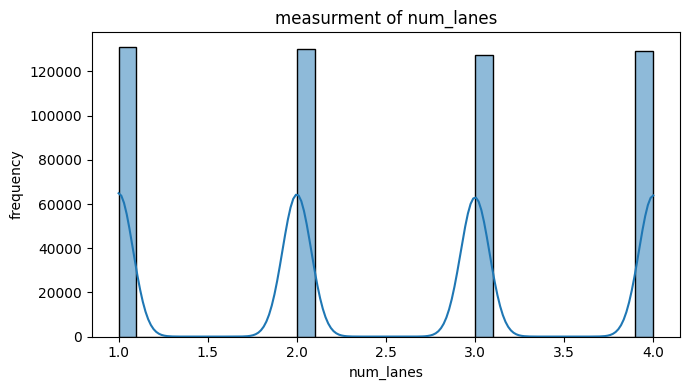

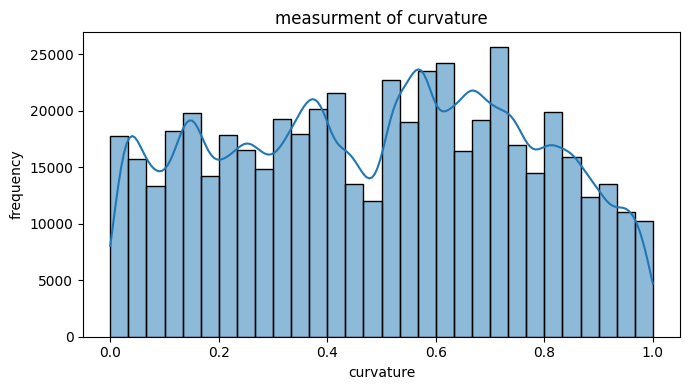

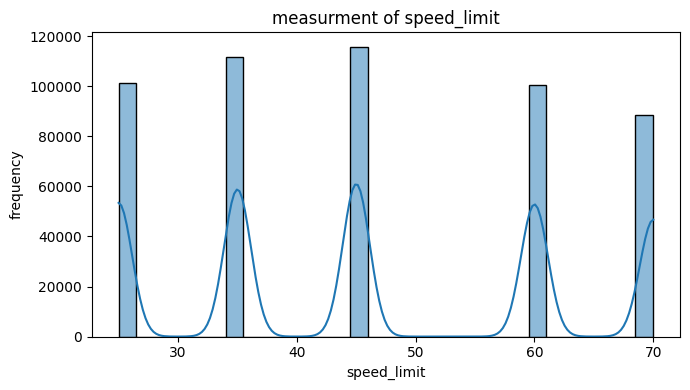

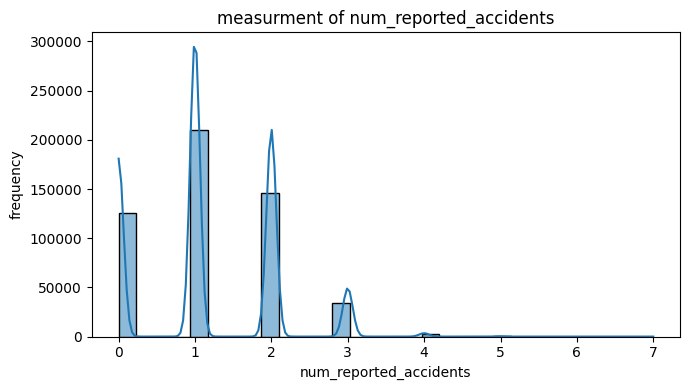

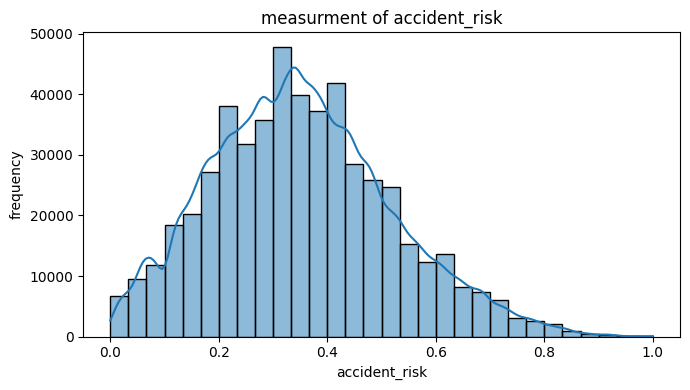

In [6]:
for col in num_cols:
 plt.figure(figsize=(7,4))
 sns.histplot(train[col],bins=30,kde=True)
 plt.title(f"measurment of {col}")
 plt.xlabel(f"{col}")
 plt.ylabel("frequency")
 plt.tight_layout()

# ****Univariat Analysis : catogorical columns**** 

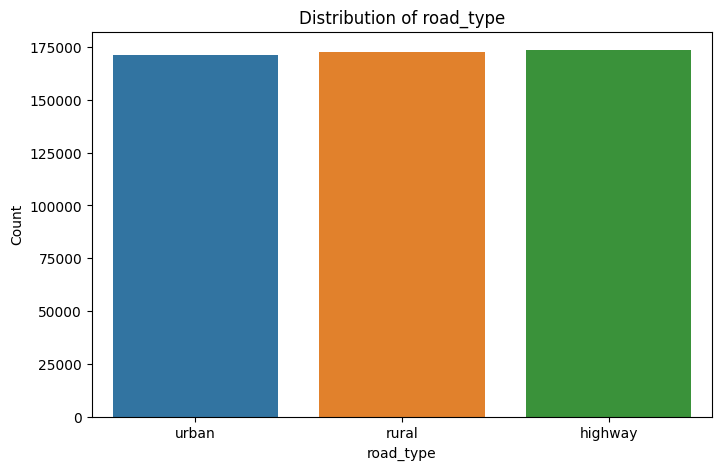

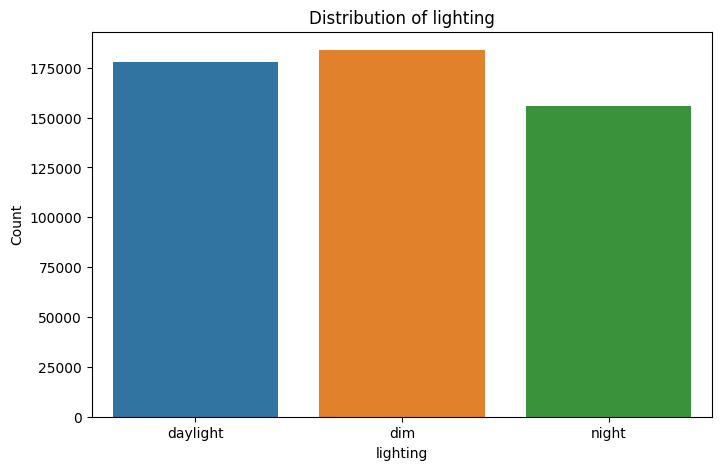

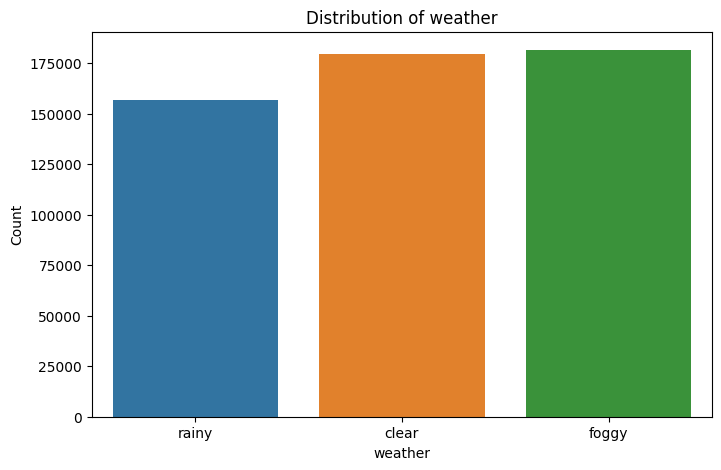

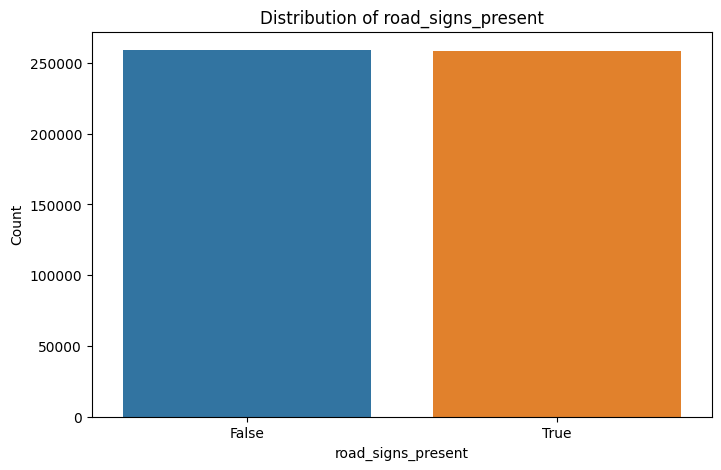

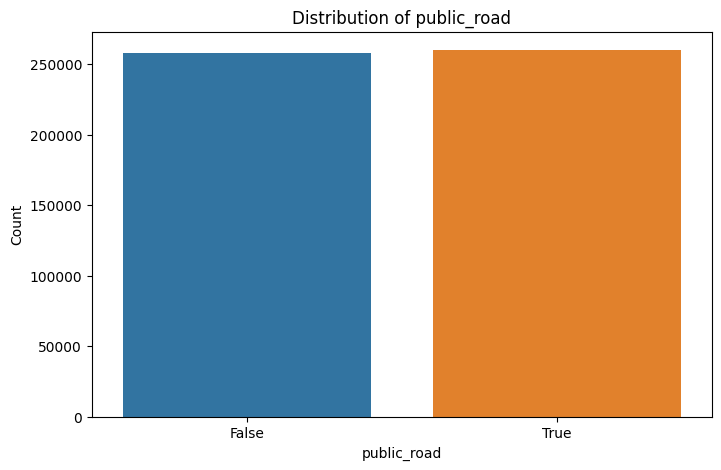

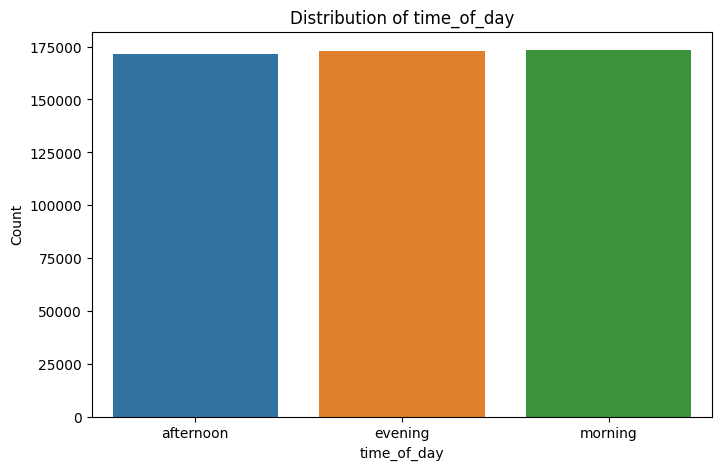

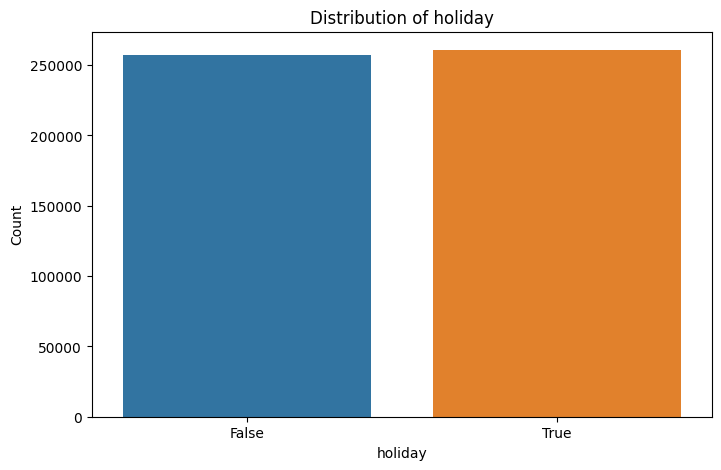

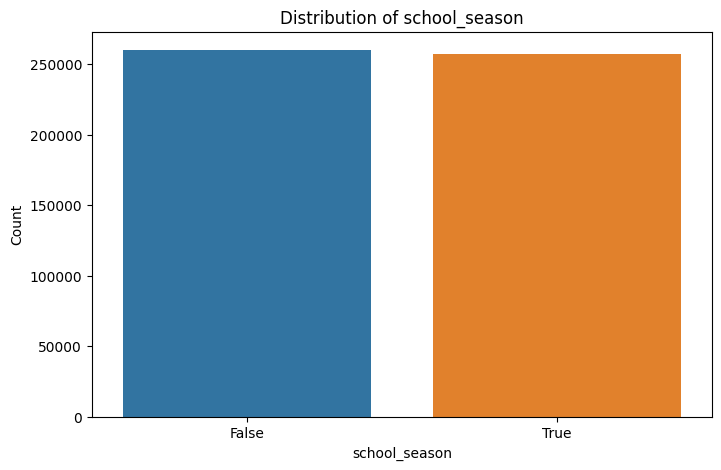

In [7]:
for col in cat_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=train)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

# ****Visualize Feature Correlations****

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


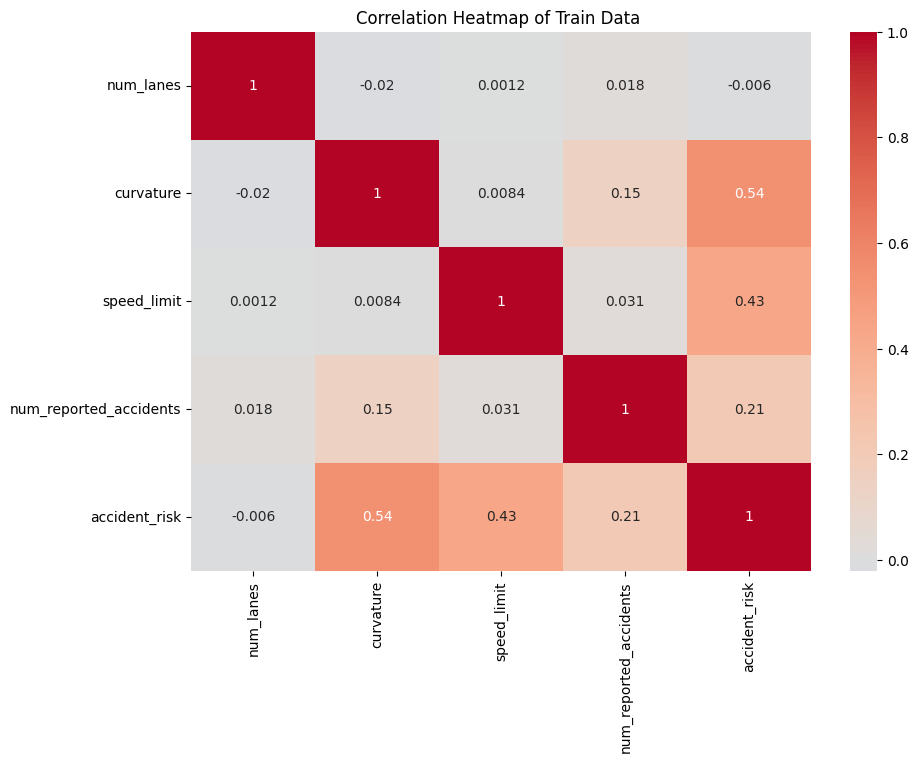

In [8]:
plt.figure(figsize=(10,7))
sns.heatmap(train[num_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Train Data ')
plt.show()

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


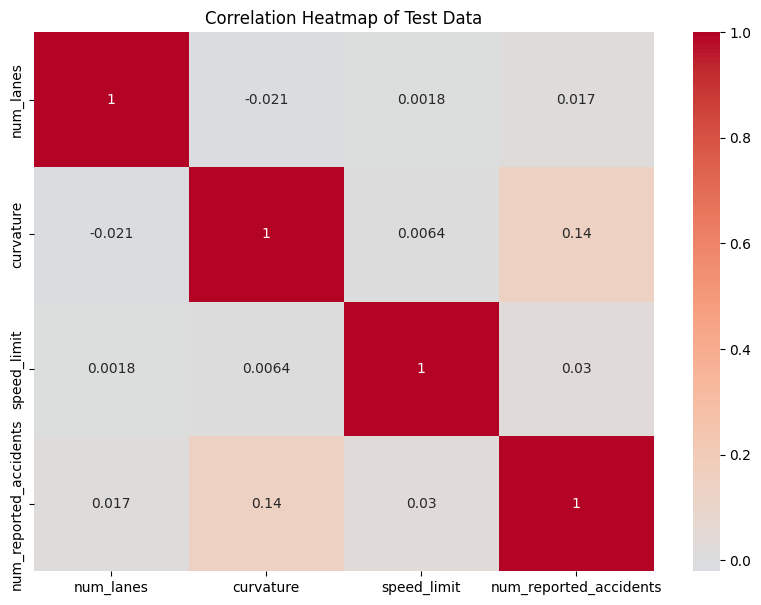

In [9]:
num_cols_test = ["num_lanes","curvature","speed_limit","num_reported_accidents"] # numerical 
plt.figure(figsize=(10,7))
sns.heatmap(test[num_cols_test].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Test Data')
plt.show()

# Handling Out Layers 

# visualisation of out layers

In [ ]:
for col in num_cols:
    plt.figure(figsize=(10,5))
    sns.boxplot(data=train,x=col)
    plt.title(f'Out Layers in {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('Frequency')
    plt.show()

# ****Handling outlayers for test data****

In [ ]:
num_cols_test = ["num_lanes","curvature","speed_limit","num_reported_accidents"] # numerical 
for col in num_cols_test:
    plt.figure(figsize=(10,5))
    sns.boxplot(data=test,x=col)
    plt.title(f'Out Layers in {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('Frequency')
    plt.show()
    

# *****Data preprocessing*****

# ******Encoding categorical variables******

In [10]:
#train
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# 1. Get categorical columns automatically (object or category dtype)
cat_cols = train.select_dtypes(include=["object","bool", "category"]).columns.tolist()
print("Categorical columns:", cat_cols)

# 2. Create encoder
encoder = OneHotEncoder(sparse=False, drop="first")

# 3. Fit + transform categorical data
encoded = encoder.fit_transform(train[cat_cols])

# 4. Get new column names
encoded_cols = encoder.get_feature_names_out(cat_cols)

# 5. Convert to dataframe
encoded_df = pd.DataFrame(encoded, columns=encoded_cols, index=train.index)

# 6. Drop original categorical columns and join new ones
train_encoded = train.drop(columns=cat_cols).join(encoded_df)

display(train_encoded.head())

Categorical columns: ['road_type', 'lighting', 'weather', 'road_signs_present', 'public_road', 'time_of_day', 'holiday', 'school_season']


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,id,num_lanes,curvature,speed_limit,num_reported_accidents,accident_risk,road_type_rural,road_type_urban,lighting_dim,lighting_night,weather_foggy,weather_rainy,road_signs_present_True,public_road_True,time_of_day_evening,time_of_day_morning,holiday_True,school_season_True
0,0,2,0.06,35,1,0.13,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,4,0.99,35,0,0.35,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
2,2,4,0.63,70,2,0.30,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,3,4,0.07,35,1,0.21,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
4,4,1,0.58,60,1,0.56,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [11]:
#test
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# 1. Get categorical columns automatically (object or category dtype)
cat_cols = test.select_dtypes(include=["object","bool", "category"]).columns.tolist()
print("Categorical columns:", cat_cols)

# 2. Create encoder
encoder = OneHotEncoder(sparse=False, drop="first")

# 3. Fit + transform categorical data
encoded = encoder.fit_transform(test[cat_cols])

# 4. Get new column names
encoded_cols = encoder.get_feature_names_out(cat_cols)

# 5. Convert to dataframe
encoded_df = pd.DataFrame(encoded, columns=encoded_cols, index=test.index)

# 6. Drop original categorical columns and join new ones
test_encoded = test.drop(columns=cat_cols).join(encoded_df)

display(test_encoded.head())

Categorical columns: ['road_type', 'lighting', 'weather', 'road_signs_present', 'public_road', 'time_of_day', 'holiday', 'school_season']


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,id,num_lanes,curvature,speed_limit,num_reported_accidents,road_type_rural,road_type_urban,lighting_dim,lighting_night,weather_foggy,weather_rainy,road_signs_present_True,public_road_True,time_of_day_evening,time_of_day_morning,holiday_True,school_season_True
0,517754,2,0.34,45,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
1,517755,3,0.04,45,0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,517756,2,0.59,35,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,517757,4,0.95,35,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,517758,2,0.86,35,3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


## *****Feature Scaling*****

  # scale numerical features using (standerd scalar)

In [12]:
# Scale numerical features
numerical_cols = ["num_lanes","curvature","speed_limit","num_reported_accidents","accident_risk"] # numerical features
scaler = StandardScaler()
#train_encoded[numerical_cols] = scaler.fit_transform(train_encoded[numerical_cols])
train[numerical_cols] = scaler.fit_transform(train[numerical_cols])

In [13]:
# Scale numerical features
numerical_cols = ["num_lanes","curvature","speed_limit","num_reported_accidents"] # numerical features
scaler = StandardScaler()
#test_encoded[numerical_cols] = scaler.fit_transform(test_encoded[numerical_cols])
test[numerical_cols] = scaler.fit_transform(test[numerical_cols])

# ****train + validation split**** 

In [14]:
X = train_encoded.drop(['id', 'accident_risk'], axis=1)
y = train_encoded['accident_risk']
X_test=test_encoded.drop(['id'], axis=1)


print("X shape:", X.shape)
print("y shape:", y.shape)
print(X_test.shape)

X shape: (517754, 16)
y shape: (517754,)
(172585, 16)


In [15]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)

X_train shape: (414203, 16)
X_val shape: (103551, 16)
y_train shape: (414203,)
y_val shape: (103551,)


# Training And Evaluate Models

In [ ]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
# Initialize the CatBoost model
catboost = CatBoostRegressor(random_state=42, verbose=0) # verbose=0 to suppress output during training

# Train the CatBoost model
print("Training CatBoost model...")
catboost.fit(X_train, y_train)

# Evaluate the CatBoost model
y_pred_catboost = catboost.predict(X_val)
rmse_catboost = mean_squared_error(y_val, y_pred_catboost)**0.5
print(f"CatBoost RMSE on validation data: {rmse_catboost}")

In [ ]:
# Make predictions on the test data using the trained models
catboost_test_pred = catboost.predict(X_test)

In [ ]:
submission_df = pd.DataFrame({'id': test['id'], 'accident_risk': catboost_test_pred})
submission_df.to_csv('submission.csv', index=False)

print("Submission file created successfully!")

# LGBM model using optuna 

LightGBM with Optuna Tuning

* Performed hyperparameter optimization with Optuna.
* Selected the best parameters and retrained the model on the full dataset.
* Predictions saved as submissionb.csv.

In [16]:
import optuna
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 500, 3000),
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.1, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 31, 512),
        'max_depth': trial.suggest_int('max_depth', -1, 12),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-3, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-3, 10.0, log=True),
        'random_state': 42,
        'n_jobs': -1
    }
    model = LGBMRegressor(**params)
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    rmse = mean_squared_error(y_val, preds, squared=False)
    return rmse

# Run Optuna optimization
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

print("Best RMSE:", study.best_value)
print("Best params:", study.best_params)

[I 2025-10-12 05:19:59,576] A new study created in memory with name: no-name-2977589c-8eb7-48cc-bea3-fc8181c5f3b5


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010145 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 16
[LightGBM] [Info] Start training from score 0.352605
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2025-10-12 05:20:18,169] Trial 0 finished with value: 0.05653014370542413 and parameters: {'n_estimators': 1183, 'learning_rate': 0.022445218492973082, 'num_leaves': 31, 'max_depth': 4, 'subsample': 0.6761654411213898, 'colsample_bytree': 0.7398036900685088, 'reg_alpha': 0.008213121221744097, 'reg_lambda': 0.41706293122795707}. Best is trial 0 with value: 0.05653014370542413.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007786 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 16
[LightGBM] [Info] Start training from score 0.352605
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2025-10-12 05:20:29,514] Trial 1 finished with value: 0.05652832998554153 and parameters: {'n_estimators': 726, 'learning_rate': 0.03373633026446175, 'num_leaves': 332, 'max_depth': 4, 'subsample': 0.8986838648465956, 'colsample_bytree': 0.718603377879713, 'reg_alpha': 0.001291489398250925, 'reg_lambda': 0.09905769146733867}. Best is trial 1 with value: 0.05652832998554153.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008621 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 16
[LightGBM] [Info] Start training from score 0.352605
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2025-10-12 05:20:52,480] Trial 2 finished with value: 0.058178095812131445 and parameters: {'n_estimators': 2956, 'learning_rate': 0.012522124330270418, 'num_leaves': 254, 'max_depth': 1, 'subsample': 0.6515862478803762, 'colsample_bytree': 0.668077559716516, 'reg_alpha': 0.38177716184479277, 'reg_lambda': 4.034750455934457}. Best is trial 1 with value: 0.05652832998554153.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009042 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 16
[LightGBM] [Info] Start training from score 0.352605
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2025-10-12 05:21:31,017] Trial 3 finished with value: 0.05635555441933463 and parameters: {'n_estimators': 1851, 'learning_rate': 0.014603474363648285, 'num_leaves': 270, 'max_depth': 6, 'subsample': 0.8496043985173923, 'colsample_bytree': 0.6703080858178048, 'reg_alpha': 1.69137997510864, 'reg_lambda': 1.2174190680152932}. Best is trial 3 with value: 0.05635555441933463.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009731 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 16
[LightGBM] [Info] Start training from score 0.352605
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2025-10-12 05:21:47,334] Trial 4 finished with value: 0.05643745388010371 and parameters: {'n_estimators': 577, 'learning_rate': 0.01195234617755558, 'num_leaves': 243, 'max_depth': 7, 'subsample': 0.9603522634538604, 'colsample_bytree': 0.7514582992894575, 'reg_alpha': 1.7857487807067773, 'reg_lambda': 1.7541505125635362}. Best is trial 3 with value: 0.05635555441933463.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011774 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 16
[LightGBM] [Info] Start training from score 0.352605


[I 2025-10-12 05:22:19,685] Trial 5 finished with value: 0.056396485603858404 and parameters: {'n_estimators': 2249, 'learning_rate': 0.06466347784007812, 'num_leaves': 50, 'max_depth': -1, 'subsample': 0.7377149708471117, 'colsample_bytree': 0.9774290439629335, 'reg_alpha': 0.26737842990932614, 'reg_lambda': 0.10219273983825002}. Best is trial 3 with value: 0.05635555441933463.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010424 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 16
[LightGBM] [Info] Start training from score 0.352605
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2025-10-12 05:22:26,876] Trial 6 finished with value: 0.06032518961560055 and parameters: {'n_estimators': 506, 'learning_rate': 0.009618450388449178, 'num_leaves': 419, 'max_depth': 3, 'subsample': 0.7471205572898816, 'colsample_bytree': 0.6526764994680322, 'reg_alpha': 0.04737855759139399, 'reg_lambda': 0.0012696844245399842}. Best is trial 3 with value: 0.05635555441933463.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008752 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 16
[LightGBM] [Info] Start training from score 0.352605
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2025-10-12 05:22:43,392] Trial 7 finished with value: 0.05649558758689537 and parameters: {'n_estimators': 1552, 'learning_rate': 0.041130286314804164, 'num_leaves': 318, 'max_depth': 6, 'subsample': 0.9301420788717653, 'colsample_bytree': 0.9582128936801704, 'reg_alpha': 9.590350086838704, 'reg_lambda': 0.7517656040848698}. Best is trial 3 with value: 0.05635555441933463.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008453 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 16
[LightGBM] [Info] Start training from score 0.352605
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2025-10-12 05:23:35,300] Trial 8 finished with value: 0.056313673678260366 and parameters: {'n_estimators': 2770, 'learning_rate': 0.056568215233539, 'num_leaves': 434, 'max_depth': 5, 'subsample': 0.9538164200590075, 'colsample_bytree': 0.6197876837553246, 'reg_alpha': 0.13890955866566262, 'reg_lambda': 2.1422591576064263}. Best is trial 8 with value: 0.056313673678260366.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011649 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 16
[LightGBM] [Info] Start training from score 0.352605


[I 2025-10-12 05:24:36,181] Trial 9 finished with value: 0.056217707194857254 and parameters: {'n_estimators': 1915, 'learning_rate': 0.007024583227524806, 'num_leaves': 210, 'max_depth': 0, 'subsample': 0.9081462174353642, 'colsample_bytree': 0.7921816424176253, 'reg_alpha': 0.006032426225538056, 'reg_lambda': 0.4385128154526671}. Best is trial 9 with value: 0.056217707194857254.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009749 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 16
[LightGBM] [Info] Start training from score 0.352605


[I 2025-10-12 05:25:35,461] Trial 10 finished with value: 0.05621571244437078 and parameters: {'n_estimators': 2281, 'learning_rate': 0.006696424963691492, 'num_leaves': 143, 'max_depth': 12, 'subsample': 0.8340770154529324, 'colsample_bytree': 0.8685839618181116, 'reg_alpha': 0.0010587619035356541, 'reg_lambda': 0.004686923129318723}. Best is trial 10 with value: 0.05621571244437078.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009792 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 16
[LightGBM] [Info] Start training from score 0.352605


[I 2025-10-12 05:26:39,541] Trial 11 finished with value: 0.05621765623353909 and parameters: {'n_estimators': 2311, 'learning_rate': 0.005086355182081964, 'num_leaves': 137, 'max_depth': 12, 'subsample': 0.8445464819114475, 'colsample_bytree': 0.8645080733463256, 'reg_alpha': 0.0017577780552524788, 'reg_lambda': 0.003244741693895988}. Best is trial 10 with value: 0.05621571244437078.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 16
[LightGBM] [Info] Start training from score 0.352605


[I 2025-10-12 05:27:45,576] Trial 12 finished with value: 0.0562180285275053 and parameters: {'n_estimators': 2402, 'learning_rate': 0.00510005289265464, 'num_leaves': 132, 'max_depth': 12, 'subsample': 0.8241161466272824, 'colsample_bytree': 0.8849813157323779, 'reg_alpha': 0.0011052986321513272, 'reg_lambda': 0.0022754921077569904}. Best is trial 10 with value: 0.05621571244437078.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009550 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 16
[LightGBM] [Info] Start training from score 0.352605


[I 2025-10-12 05:28:48,658] Trial 13 finished with value: 0.056212239118407656 and parameters: {'n_estimators': 2361, 'learning_rate': 0.0058382422836159315, 'num_leaves': 134, 'max_depth': 12, 'subsample': 0.7823033888535377, 'colsample_bytree': 0.8686966970119134, 'reg_alpha': 0.0073983463462065635, 'reg_lambda': 0.007508555844500752}. Best is trial 13 with value: 0.056212239118407656.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009302 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 16
[LightGBM] [Info] Start training from score 0.352605


[I 2025-10-12 05:29:53,065] Trial 14 finished with value: 0.056219455107757874 and parameters: {'n_estimators': 2607, 'learning_rate': 0.007441570694549561, 'num_leaves': 129, 'max_depth': 9, 'subsample': 0.7551648497880202, 'colsample_bytree': 0.8701389644524591, 'reg_alpha': 0.017197696697323808, 'reg_lambda': 0.010446270021172844}. Best is trial 13 with value: 0.056212239118407656.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009454 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 16
[LightGBM] [Info] Start training from score 0.352605
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-10-12 05:30:37,663] Trial 15 finished with value: 0.056324279869926025 and parameters: {'n_estimators': 2004, 'learning_rate': 0.018173888580241274, 'num_leaves': 183, 'max_depth': 10, 'subsample': 0.7934377875197453, 'colsample_bytree': 0.9210123264624691, 'reg_alpha': 0.0048653153438848705, 'reg_lambda': 0.01285292363427843}. Best is trial 13 with value: 0.056212239118407656.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009416 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 16
[LightGBM] [Info] Start training from score 0.352605
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2025-10-12 05:31:47,386] Trial 16 finished with value: 0.056277300308809994 and parameters: {'n_estimators': 1436, 'learning_rate': 0.008001656807191518, 'num_leaves': 512, 'max_depth': 10, 'subsample': 0.611233312401852, 'colsample_bytree': 0.8312212539891891, 'reg_alpha': 0.03137891077195305, 'reg_lambda': 0.015450888481928484}. Best is trial 13 with value: 0.056212239118407656.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009614 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 16
[LightGBM] [Info] Start training from score 0.352605


[I 2025-10-12 05:32:30,770] Trial 17 finished with value: 0.05632253118429888 and parameters: {'n_estimators': 2556, 'learning_rate': 0.02279599399292249, 'num_leaves': 73, 'max_depth': 8, 'subsample': 0.7870108995991929, 'colsample_bytree': 0.8085054006214921, 'reg_alpha': 0.003240799744936357, 'reg_lambda': 0.047753468374596146}. Best is trial 13 with value: 0.056212239118407656.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009157 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 16
[LightGBM] [Info] Start training from score 0.352605


[I 2025-10-12 05:33:01,667] Trial 18 finished with value: 0.05682470290359984 and parameters: {'n_estimators': 2119, 'learning_rate': 0.0875534972576443, 'num_leaves': 92, 'max_depth': 11, 'subsample': 0.6960125227448775, 'colsample_bytree': 0.9374016720938809, 'reg_alpha': 0.015284000829224735, 'reg_lambda': 0.005390966285466366}. Best is trial 13 with value: 0.056212239118407656.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009523 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 16
[LightGBM] [Info] Start training from score 0.352605


[I 2025-10-12 05:34:18,750] Trial 19 finished with value: 0.056236527109665285 and parameters: {'n_estimators': 2946, 'learning_rate': 0.006383204945049732, 'num_leaves': 167, 'max_depth': 9, 'subsample': 0.9993099441310858, 'colsample_bytree': 0.9037626624303816, 'reg_alpha': 0.0028652957325493366, 'reg_lambda': 0.03816631184956626}. Best is trial 13 with value: 0.056212239118407656.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009594 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 16
[LightGBM] [Info] Start training from score 0.352605
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2025-10-12 05:35:18,380] Trial 20 finished with value: 0.05627273069256311 and parameters: {'n_estimators': 1575, 'learning_rate': 0.010105660274155817, 'num_leaves': 326, 'max_depth': 10, 'subsample': 0.8805295417194172, 'colsample_bytree': 0.833702888708494, 'reg_alpha': 0.06274360839994073, 'reg_lambda': 0.005696960117906996}. Best is trial 13 with value: 0.056212239118407656.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008560 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 16
[LightGBM] [Info] Start training from score 0.352605


[I 2025-10-12 05:36:19,176] Trial 21 finished with value: 0.05622317126790691 and parameters: {'n_estimators': 2320, 'learning_rate': 0.0051528655586193595, 'num_leaves': 113, 'max_depth': 12, 'subsample': 0.850818017917298, 'colsample_bytree': 0.8586830923516168, 'reg_alpha': 0.0018540953938485914, 'reg_lambda': 0.0024818052152297356}. Best is trial 13 with value: 0.056212239118407656.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009766 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 16
[LightGBM] [Info] Start training from score 0.352605


[I 2025-10-12 05:37:35,179] Trial 22 finished with value: 0.05621661043658885 and parameters: {'n_estimators': 2538, 'learning_rate': 0.005223402170946587, 'num_leaves': 168, 'max_depth': 12, 'subsample': 0.8192683981198803, 'colsample_bytree': 0.7809520035943105, 'reg_alpha': 0.010308588444756517, 'reg_lambda': 0.0010850364774918832}. Best is trial 13 with value: 0.056212239118407656.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009671 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 16
[LightGBM] [Info] Start training from score 0.352605


[I 2025-10-12 05:38:47,924] Trial 23 finished with value: 0.0562450882582727 and parameters: {'n_estimators': 2568, 'learning_rate': 0.008333229328359863, 'num_leaves': 205, 'max_depth': 11, 'subsample': 0.8083270128014223, 'colsample_bytree': 0.7600918619866986, 'reg_alpha': 0.01263900609689867, 'reg_lambda': 0.0010694050595342344}. Best is trial 13 with value: 0.056212239118407656.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 16
[LightGBM] [Info] Start training from score 0.352605


[I 2025-10-12 05:39:51,924] Trial 24 finished with value: 0.05620769254202876 and parameters: {'n_estimators': 2120, 'learning_rate': 0.00624060939662212, 'num_leaves': 175, 'max_depth': 11, 'subsample': 0.7643174272033464, 'colsample_bytree': 0.7815036897694603, 'reg_alpha': 0.025215534589865012, 'reg_lambda': 0.027549101122037074}. Best is trial 24 with value: 0.05620769254202876.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010530 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 16
[LightGBM] [Info] Start training from score 0.352605
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2025-10-12 05:41:01,521] Trial 25 finished with value: 0.056238024173575325 and parameters: {'n_estimators': 2175, 'learning_rate': 0.006552076475200274, 'num_leaves': 212, 'max_depth': 8, 'subsample': 0.7231249900801374, 'colsample_bytree': 0.8359465502959663, 'reg_alpha': 0.020980560113597814, 'reg_lambda': 0.028536584311276134}. Best is trial 24 with value: 0.05620769254202876.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009546 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 16
[LightGBM] [Info] Start training from score 0.352605


[I 2025-10-12 05:41:44,026] Trial 26 finished with value: 0.056220071317696754 and parameters: {'n_estimators': 2058, 'learning_rate': 0.009606238724971482, 'num_leaves': 90, 'max_depth': 11, 'subsample': 0.7755167638301932, 'colsample_bytree': 0.9995448973582653, 'reg_alpha': 0.0038512872260023177, 'reg_lambda': 0.09315914215188988}. Best is trial 24 with value: 0.05620769254202876.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010003 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 16
[LightGBM] [Info] Start training from score 0.352605
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2025-10-12 05:42:47,386] Trial 27 finished with value: 0.056347862718456876 and parameters: {'n_estimators': 2723, 'learning_rate': 0.01654534220498617, 'num_leaves': 153, 'max_depth': 9, 'subsample': 0.7007885799870854, 'colsample_bytree': 0.8913861123062595, 'reg_alpha': 0.10390408118460967, 'reg_lambda': 0.006228470857263873}. Best is trial 24 with value: 0.05620769254202876.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008622 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 16
[LightGBM] [Info] Start training from score 0.352605


[I 2025-10-12 05:43:27,583] Trial 28 finished with value: 0.05622852287221985 and parameters: {'n_estimators': 1743, 'learning_rate': 0.012079176585905156, 'num_leaves': 103, 'max_depth': 11, 'subsample': 0.8682248401162351, 'colsample_bytree': 0.7191101423905315, 'reg_alpha': 0.029255900336964593, 'reg_lambda': 0.01908806692028604}. Best is trial 24 with value: 0.05620769254202876.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009513 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 16
[LightGBM] [Info] Start training from score 0.352605


[I 2025-10-12 05:43:52,605] Trial 29 finished with value: 0.0562756212719675 and parameters: {'n_estimators': 1694, 'learning_rate': 0.027277210329166673, 'num_leaves': 32, 'max_depth': 8, 'subsample': 0.6590017494583211, 'colsample_bytree': 0.8096759480718401, 'reg_alpha': 0.00775178992607013, 'reg_lambda': 0.2370667864724864}. Best is trial 24 with value: 0.05620769254202876.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011998 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 16
[LightGBM] [Info] Start training from score 0.352605


[I 2025-10-12 05:44:38,863] Trial 30 finished with value: 0.05619897982130328 and parameters: {'n_estimators': 1236, 'learning_rate': 0.0061983721650076175, 'num_leaves': 223, 'max_depth': 10, 'subsample': 0.7687032806642605, 'colsample_bytree': 0.919580390872797, 'reg_alpha': 0.002234681893469298, 'reg_lambda': 0.007352889278321604}. Best is trial 30 with value: 0.05619897982130328.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011343 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 16
[LightGBM] [Info] Start training from score 0.352605


[I 2025-10-12 05:45:17,544] Trial 31 finished with value: 0.056214092897939806 and parameters: {'n_estimators': 982, 'learning_rate': 0.005986213040937806, 'num_leaves': 230, 'max_depth': 10, 'subsample': 0.7676914158866776, 'colsample_bytree': 0.9284448837055814, 'reg_alpha': 0.0026353061131110483, 'reg_lambda': 0.007956134334359868}. Best is trial 30 with value: 0.05619897982130328.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012320 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 16
[LightGBM] [Info] Start training from score 0.352605


[I 2025-10-12 05:45:59,289] Trial 32 finished with value: 0.056208259641923386 and parameters: {'n_estimators': 1039, 'learning_rate': 0.005789872013428764, 'num_leaves': 240, 'max_depth': 10, 'subsample': 0.7629534008231325, 'colsample_bytree': 0.9362601889998232, 'reg_alpha': 0.007190542628856639, 'reg_lambda': 0.009789286067842864}. Best is trial 30 with value: 0.05619897982130328.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011577 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 16
[LightGBM] [Info] Start training from score 0.352605


[I 2025-10-12 05:46:41,616] Trial 33 finished with value: 0.05620285374358308 and parameters: {'n_estimators': 1102, 'learning_rate': 0.008537088866628911, 'num_leaves': 290, 'max_depth': 11, 'subsample': 0.7161120577089108, 'colsample_bytree': 0.959212646020681, 'reg_alpha': 0.007070228316806979, 'reg_lambda': 0.025947446312698665}. Best is trial 30 with value: 0.05619897982130328.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011654 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 16
[LightGBM] [Info] Start training from score 0.352605
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2025-10-12 05:47:13,565] Trial 34 finished with value: 0.056240206104859886 and parameters: {'n_estimators': 1081, 'learning_rate': 0.008592379954524543, 'num_leaves': 294, 'max_depth': 7, 'subsample': 0.7174925723843438, 'colsample_bytree': 0.9530727695226948, 'reg_alpha': 0.0051579965597434545, 'reg_lambda': 0.06254549546750961}. Best is trial 30 with value: 0.05619897982130328.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010357 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 16
[LightGBM] [Info] Start training from score 0.352605
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2025-10-12 05:47:50,280] Trial 35 finished with value: 0.056234556240831804 and parameters: {'n_estimators': 894, 'learning_rate': 0.010900289423299772, 'num_leaves': 364, 'max_depth': 9, 'subsample': 0.6778877626234642, 'colsample_bytree': 0.98923209215984, 'reg_alpha': 0.03817305440666616, 'reg_lambda': 0.02758918654585648}. Best is trial 30 with value: 0.05619897982130328.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011447 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 16
[LightGBM] [Info] Start training from score 0.352605
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2025-10-12 05:48:08,055] Trial 36 finished with value: 0.05680752834569725 and parameters: {'n_estimators': 1299, 'learning_rate': 0.014126162012255089, 'num_leaves': 267, 'max_depth': 3, 'subsample': 0.728570650425997, 'colsample_bytree': 0.9723344519908378, 'reg_alpha': 0.009242130022175126, 'reg_lambda': 0.19829261103726822}. Best is trial 30 with value: 0.05619897982130328.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011587 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 16
[LightGBM] [Info] Start training from score 0.352605
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2025-10-12 05:48:39,869] Trial 37 finished with value: 0.0562187349063842 and parameters: {'n_estimators': 757, 'learning_rate': 0.008654880699647786, 'num_leaves': 292, 'max_depth': 10, 'subsample': 0.6339155675308106, 'colsample_bytree': 0.9050390124726219, 'reg_alpha': 0.06795206732293899, 'reg_lambda': 0.01984472779389778}. Best is trial 30 with value: 0.05619897982130328.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011537 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 16
[LightGBM] [Info] Start training from score 0.352605
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2025-10-12 05:49:17,974] Trial 38 finished with value: 0.056238395246611034 and parameters: {'n_estimators': 1334, 'learning_rate': 0.007532404782470374, 'num_leaves': 239, 'max_depth': 7, 'subsample': 0.7588972746148247, 'colsample_bytree': 0.9388302880461612, 'reg_alpha': 0.0018491055996209414, 'reg_lambda': 7.038651084801239}. Best is trial 30 with value: 0.05619897982130328.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007900 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 16
[LightGBM] [Info] Start training from score 0.352605
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2025-10-12 05:50:04,890] Trial 39 finished with value: 0.05624594368572383 and parameters: {'n_estimators': 1128, 'learning_rate': 0.014387052486649921, 'num_leaves': 366, 'max_depth': 11, 'subsample': 0.7425949799969481, 'colsample_bytree': 0.6895156650447875, 'reg_alpha': 0.16102114226791342, 'reg_lambda': 0.056591678448167766}. Best is trial 30 with value: 0.05619897982130328.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009867 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 16
[LightGBM] [Info] Start training from score 0.352605
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2025-10-12 05:50:18,583] Trial 40 finished with value: 0.05718244753113555 and parameters: {'n_estimators': 698, 'learning_rate': 0.005973183609891042, 'num_leaves': 283, 'max_depth': 5, 'subsample': 0.7041599140124319, 'colsample_bytree': 0.9757619592158923, 'reg_alpha': 0.021866639089079678, 'reg_lambda': 0.11872678330943984}. Best is trial 30 with value: 0.05619897982130328.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010250 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 16
[LightGBM] [Info] Start training from score 0.352605


[I 2025-10-12 05:51:00,391] Trial 41 finished with value: 0.056191693159100185 and parameters: {'n_estimators': 1208, 'learning_rate': 0.006025818565942533, 'num_leaves': 198, 'max_depth': 11, 'subsample': 0.7989103892207271, 'colsample_bytree': 0.9565773942766918, 'reg_alpha': 0.007684608465047987, 'reg_lambda': 0.00965914653867928}. Best is trial 41 with value: 0.056191693159100185.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011878 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 16
[LightGBM] [Info] Start training from score 0.352605


[I 2025-10-12 05:51:40,421] Trial 42 finished with value: 0.05619035442529907 and parameters: {'n_estimators': 1269, 'learning_rate': 0.0075355562003997, 'num_leaves': 185, 'max_depth': 11, 'subsample': 0.80534966514391, 'colsample_bytree': 0.9499548901994703, 'reg_alpha': 0.012727609915786295, 'reg_lambda': 0.010458910497870897}. Best is trial 42 with value: 0.05619035442529907.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 16
[LightGBM] [Info] Start training from score 0.352605


[I 2025-10-12 05:52:17,493] Trial 43 finished with value: 0.056202422939654315 and parameters: {'n_estimators': 1230, 'learning_rate': 0.009372677015466385, 'num_leaves': 185, 'max_depth': 11, 'subsample': 0.8096618745322768, 'colsample_bytree': 0.9641717860924844, 'reg_alpha': 0.012071598694142361, 'reg_lambda': 0.026023373260466214}. Best is trial 42 with value: 0.05619035442529907.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011864 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 16
[LightGBM] [Info] Start training from score 0.352605
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2025-10-12 05:52:57,561] Trial 44 finished with value: 0.056234152430168695 and parameters: {'n_estimators': 1198, 'learning_rate': 0.010966477682209735, 'num_leaves': 202, 'max_depth': 11, 'subsample': 0.8043177508949365, 'colsample_bytree': 0.9563725757465374, 'reg_alpha': 2.100723857614763, 'reg_lambda': 0.004050775988443831}. Best is trial 42 with value: 0.05619035442529907.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011930 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 16
[LightGBM] [Info] Start training from score 0.352605
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2025-10-12 05:53:30,402] Trial 45 finished with value: 0.056211193345797224 and parameters: {'n_estimators': 870, 'learning_rate': 0.009057597522466704, 'num_leaves': 258, 'max_depth': 9, 'subsample': 0.8077311484959185, 'colsample_bytree': 0.9641631963167705, 'reg_alpha': 0.4069452043811375, 'reg_lambda': 0.0023314779993320284}. Best is trial 42 with value: 0.05619035442529907.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011469 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 16
[LightGBM] [Info] Start training from score 0.352605
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2025-10-12 05:53:46,228] Trial 46 finished with value: 0.05723147762520488 and parameters: {'n_estimators': 1237, 'learning_rate': 0.0071012056125112485, 'num_leaves': 184, 'max_depth': 3, 'subsample': 0.8372094960789935, 'colsample_bytree': 0.9136164171954343, 'reg_alpha': 0.0024141778501851102, 'reg_lambda': 0.015071343384508532}. Best is trial 42 with value: 0.05619035442529907.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009960 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 16
[LightGBM] [Info] Start training from score 0.352605


[I 2025-10-12 05:54:32,706] Trial 47 finished with value: 0.05635699518794036 and parameters: {'n_estimators': 1465, 'learning_rate': 0.013186469640219061, 'num_leaves': 357, 'max_depth': 12, 'subsample': 0.8570696449104108, 'colsample_bytree': 0.9818378341457515, 'reg_alpha': 0.004436645020319725, 'reg_lambda': 0.011173809330398304}. Best is trial 42 with value: 0.05619035442529907.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009821 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 16
[LightGBM] [Info] Start training from score 0.352605
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

[I 2025-10-12 05:55:05,350] Trial 48 finished with value: 0.05660668672412111 and parameters: {'n_estimators': 1463, 'learning_rate': 0.04101819802020032, 'num_leaves': 224, 'max_depth': 10, 'subsample': 0.9042957602380041, 'colsample_bytree': 0.9498403169245303, 'reg_alpha': 0.013987096520378068, 'reg_lambda': 0.0017465911815591718}. Best is trial 42 with value: 0.05619035442529907.


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010088 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 171
[LightGBM] [Info] Number of data points in the train set: 414203, number of used features: 16
[LightGBM] [Info] Start training from score 0.352605


[I 2025-10-12 05:55:52,863] Trial 49 finished with value: 0.056219971874331615 and parameters: {'n_estimators': 1338, 'learning_rate': 0.0075280220805277265, 'num_leaves': 302, 'max_depth': 12, 'subsample': 0.8224643083586648, 'colsample_bytree': 0.9962604762994238, 'reg_alpha': 0.0013154268118950774, 'reg_lambda': 0.020769057046004756}. Best is trial 42 with value: 0.05619035442529907.


Best RMSE: 0.05619035442529907
Best params: {'n_estimators': 1269, 'learning_rate': 0.0075355562003997, 'num_leaves': 185, 'max_depth': 11, 'subsample': 0.80534966514391, 'colsample_bytree': 0.9499548901994703, 'reg_alpha': 0.012727609915786295, 'reg_lambda': 0.010458910497870897}


# train + val into full dataset

In [20]:
import pandas as pd

# Concatenate back train + val into full dataset
X_full = pd.concat([X_train, X_val], axis=0)
y_full = pd.concat([y_train, y_val], axis=0)

# Get best params from Optuna

In [21]:
# 1. Get best params from Optuna
best_params = study.best_params

# 2. Retrain on full train data (combine train+val)
best_model = LGBMRegressor(**best_params, random_state=42, n_jobs=-1)

best_model.fit(X_full, y_full, eval_metric="rmse")

# 3. Predict on X_test
y_test_pred = best_model.predict(X_test)

print("Test predictions:", y_test_pred[:10])  # show first 10 predictions


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011531 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 172
[LightGBM] [Info] Number of data points in the train set: 517754, number of used features: 16
[LightGBM] [Info] Start training from score 0.352377
Test predictions: [0.29412437 0.11998079 0.18359672 0.31991213 0.40652723 0.45870575
 0.26383418 0.19674244 0.36806981 0.32420998]


# submission of lgbm using optuna 

In [22]:

# Example using LGBM predictions:
submission_df = pd.DataFrame({'id': test['id'], 'accident_risk':y_test_pred})
# submission_df = pd.DataFrame({'id': test_df['id'], 'accident_risk': averaged_predictions})


# Save the submission file
submission_df.to_csv('submissionb.csv', index=False)

print("Submission file created successfully!")

Submission file created successfully!


📈 Results

* Trained models achieved strong predictive accuracy.

* Feature scaling and encoding significantly improved model performance.

* Outlier removal helped reduce noise and enhanced generalization.

🚀 Future Improvements

* Experiment with ensemble stacking.

* Incorporate real-time weather and traffic data.

* Optimize hyperparameters for further performance gains.

* (Your most recent submission scored 0.05563)